In [13]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy import stats 


df = pd.read_csv('/Users/michael/dev/DataScience/ds_injury_project/patient-injuries.csv')




In [14]:
df.columns

Index(['Year', 'OSHPD ID', 'Facility Name', 'County Name', 'Type of Control',
       'Principal Injury Group', 'Count'],
      dtype='object')

In [15]:
df['Principal Injury Group'].value_counts()

Accidental Falls                       2369
Other Accidents                        2331
Adverse Effects of Drugs               2317
Misadventures/Complications            2193
Late Effects of Injury                 2155
Rail & Motor Vehicles                  2104
Accidental Poisoning                   2080
Natural/Environment                    2066
Self-Inflicted                         2061
Submersion/Suffocation/Foreign Body    2006
Inflicted by Others                    1964
Undetermined                           1952
Other Vehicle/Transport                1870
Fire Accidents                         1263
War                                      91
Name: Principal Injury Group, dtype: int64

In [16]:
df['Year'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014])

In [17]:
df.describe()


,Year,OSHPD ID,Count
count,28822.000000,28822.000000,28822.000000
mean,2011.500625,280108.428562,119.638436
std,1.709594,136199.167343,269.799362
min,2009.000000,10735.000000,1.000000
25%,2010.000000,190382.000000,6.000000
50%,2012.000000,301140.000000,23.000000
75%,2013.000000,370875.000000,90.000000
max,2014.000000,580996.000000,5338.000000


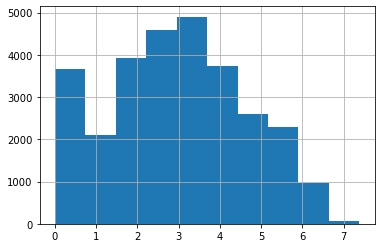

In [30]:
#normalize the distribution using boxcox

df['fitted_count'] = stats.boxcox(df['Count'])[0]
df['fitted_count'].hist()

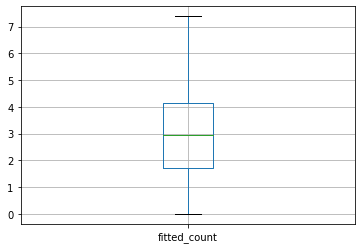

In [32]:
df.boxplot(column='fitted_count')

In [33]:
df[['Year','County Name','Principal Injury Group','fitted_count']].corr()

,Year,fitted_count
Year,1.000000,0.010538
fitted_count,0.010538,1.000000


In [50]:
groups = df.groupby('Principal Injury Group')['Count'].mean().sort_values('Count', ascending=False)
df.plot.bar()

ValueError: No axis named Count for object type <class 'pandas.core.series.Series'>